In [88]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
import graphviz
from joblib import Parallel, delayed

## for explainer
import shap



# set float display default
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

pd.set_option('display.max_colwidth', None)

In [2]:
dataset = pd.read_csv('covid_recoded_data.csv')


In [4]:
dataset['batch_date'] = pd.to_datetime(dataset['batch_date'])

In [15]:
dataset

,gender,age,geography,financial_situation,education,employment_status,ethnicity,religion,batch_date,observation_lat,observation_lon,HASC_code,L0_name,L1_name,L2_name,intro_input,the_following_questions_will_ask_you_about_the_spread_of_covid_19_in_your_area,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",why_were_you_not_tested,how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,what_kind_of_locations_or_facilities_are_offering_testing_in_your_city,the_following_questions_will_ask_you_about_the_government_response_to_and_economic_impact_of_the_covid_19_pandemic_in_your_area,which_of_the_following_activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,which_of_the_following_categories_of_items_were_difficult_or_impossible_to_find,from_which_of_the_following_places_have_you_purchased_or_looked_for_food_and_other_supplies,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,the_following_questions_will_ask_you_about_the_impact_of_the_covid_19_pandemic_on_your_day_to_day_life_and_personal_finances,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,which_of_the_following_factors_have_inclined_you_to_not_closely_follow_the_guidance_of_social_distancing,which_of_the_following_behaviors_are_you_or_do_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,finally_this_last_group_of_questions_will_ask_you_about_how_you_receive_information_about_covid_19,how_have_you_been_getting_updates_on_covid_19_from_the_list_below_select_all_the_types_of_media_youu2019ve_been_relying_on_for_updates_as_coronavirus_cases_increase,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,in_the_past_6_months_have_you_heard_read_or_seen_any_information_or_messaging_that_highlights_the_downsides_of_a_covid_19_vaccine,which_media_outlets_do_you_think_only_report_on_the_potential_disadvantages_of_a_covid_19_vaccine,how_safe_do_you_believe_the_covid_19_vaccines_being_developed_now_are,which_of_the_following_countries_do_you_feel_the_most_ready_to_receive_a_covid_19_vaccine_from,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,when_a_covid_19_vaccine_becomes_widely_publicly_available_how_likely_are_you_to_get_it,how_quickly_will_you_get_the_covid_19_vaccine,fa1_fear_covid,...,when_do_you_anticipate_feeling_comfortable_riding_public_transportation_Only when respected medical professionals indicate that it is safe,when_do_you_anticipate_feeling_comfortable_riding_public_transportation_did not exist,when_do_you_anticipate_feeling_comfortable_traveling_by_airplane_As soon as a vaccine is widely available,when_do_you_anticipate_feeling_comfortable_traveling_by_airplane_As soon as an antibody test is widely available,when_do_you_anticipate_feeling_comfortable_traveling_by_airplane_As soon as cases in my area begin to decline,when_do_y

In [16]:
ds = dataset.groupby('L0_name').resample("W", on='batch_date').mean().reset_index()

In [17]:
ds

,L0_name,batch_date,observation_lat,observation_lon,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_fin

In [18]:
ds.isnull().sum()

L0_name                                                                                              0
batch_date                                                                                           0
observation_lat                                                                                     16
observation_lon                                                                                     16
how_concerned_are_you_about_the_spread_of_covid_19_in_your_community                                16
                                                                                                    ..
have_you_personally_contracted_covid_19_I may have contracted COVID-19, but have not been tested    16
have_you_personally_contracted_covid_19_No (tested negative or have shown no symptoms)              16
have_you_personally_contracted_covid_19_Yes, I was tested and confirmed positive                    16
did_you_seek_medical_care_to_treat_covid_19_No                           

In [19]:
dataset2 = pd.read_csv('covid_cases_by_country_by_week.csv')

In [20]:
dataset2['Last_Update'] = pd.to_datetime(dataset2['Last_Update'])

In [42]:
ts_df = pd.merge(ds, dataset2, left_on=['L0_name','batch_date'], right_on=['Country_Region','Last_Update'], how='left')

In [43]:
ts_df.drop(columns=['Country_Region','Last_Update','observation_lat','observation_lon','Unnamed: 0'], inplace=True)

In [44]:
ts_df

,L0_name,batch_date,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_find_frozen_goods,categories_of_ite

In [45]:
ts_df.isnull().sum()

L0_name                                                                                    0
batch_date                                                                                 0
how_concerned_are_you_about_the_spread_of_covid_19_in_your_community                      16
how_satisfied_were_you_with_the_level_of_care_you_received                               631
how_confident_are_you_that_you_are_immune_should_a_"second_wave"_emerge_in_the_future    793
                                                                                        ... 
Active                                                                                    39
Confirmed_new                                                                             39
Deaths_new                                                                                39
Recovered_new                                                                             39
Active_new                                                            

In [48]:
#drop rows missing dependent variables.
ts_df= ts_df[~ts_df['Confirmed_new'].isnull()]

In [49]:
ts_df

,L0_name,batch_date,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_find_frozen_goods,categories_of_ite

In [68]:
ts_df.isnull().sum().sort_values()

L0_name                                                                                                                                                                                                                                                        0
Deaths_new                                                                                                                                                                                                                                                     0
Confirmed_new                                                                                                                                                                                                                                                  0
Active                                                                                                                                                                                                                               

In [137]:
ts_df.fillna(ts_df.mean(), inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [138]:
ts_df.isnull().sum()

L0_name                                                                                                                                                                                                                                                     0
batch_date                                                                                                                                                                                                                                                  0
how_concerned_are_you_about_the_spread_of_covid_19_in_your_community                                                                                                                                                                                        0
how_satisfied_were_you_with_the_level_of_care_you_received                                                                                                                                                                                    

In [53]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer.fit(X)
#X = imputer.transform(X)

In [139]:
ts_df['Confirmed_new'].describe()

count      3704.00
mean      19933.67
std       83755.92
min      -25315.00
25%         172.00
50%        1725.00
75%        8260.50
max     1521771.00
Name: Confirmed_new, dtype: float64

In [140]:
ts_df[ts_df['Confirmed_new']<0] 

,L0_name,batch_date,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_find_frozen_goods,categories_of_ite

In [148]:
#drop negative confirmed_new
ts_df = ts_df[ts_df['Confirmed_new']>=0] 

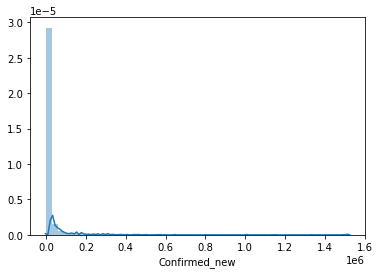

In [149]:
sns.distplot(ts_df['Confirmed_new'])

In [150]:
ts_df['Confirmed_new_log'] = np.log(ts_df['Confirmed_new'] + 1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [151]:
ts_df

,L0_name,batch_date,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_find_frozen_goods,categories_of_ite

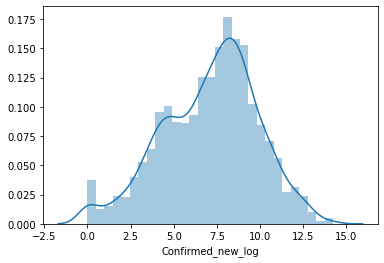

In [152]:
sns.distplot(ts_df['Confirmed_new_log'])

In [153]:
ts_df['Confirmed_new_log'].isnull().sum()

0

In [157]:
X = ts_df.iloc[:, 2:-9]
y = ts_df['Confirmed_new_log']

In [158]:
X

,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_find_frozen_goods,categories_of_items_were_difficult_o

In [159]:
y.describe()

count   3696.00
mean       7.12
std        2.76
min        0.00
25%        5.16
50%        7.46
75%        9.02
max       14.24
Name: Confirmed_new_log, dtype: float64

# Split train and test

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [162]:
X_train

,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,has_your_income_been_at_all_affected_by_the_covid_19_pandemic,how_concerned_are_you_that_your_economic_situation_will_be_negatively_impacted_in_the_next_30_days_as_a_result_of_a_change_in_economic_activity,when_you_leave_your_home_do_you_typically_wear_a_face_mask,how_much_of_an_impact_do_you_believe_the_covid_19_pandemic_and_subsequent_quarantine_measures_have_had_on_your_mental_and_emotional_health,how_much_do_you_agree_with_the_following_statement_u201ci_am_well_informed_about_covid_19_and_understand_where_to_get_additional_informationu201d,how_satisfied_are_you_with_the_media_coverage_of_covid_19,how_much_do_you_agree_with_the_following_statement_u201cvaccines_are_necessary_to_promote_herd_immunity_and_ensure_the_health_and_safety_of_everyone_in_the_community_including_immunocompromised_individuals_u201d,fa1_fear_covid,fa2_informative,fa3_national_econ,fa4_personal_econ_mental,locations_offering_testing_in_your_city_My_primary_care_physicians_office,locations_offering_testing_in_your_city_Drive_up_testing_facility,locations_offering_testing_in_your_city_Local_health_department,locations_offering_testing_in_your_city_Urgent_care_clinic,locations_offering_testing_in_your_city_Pharmacy,locations_offering_testing_in_your_city_Emergency_room,locations_offering_testing_in_your_city_Hospital,locations_offering_testing_in_your_city_Other,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Visiting_a_friends_home_fewer_than_10,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Shopping_at_non-essential_stores,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Going_out_to_bars_and_restaurants,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Seeing_movies_at_the_movie_theatre,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Riding_public_transportation,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_Traveling_by_airplane,activities_will_you_feel_comfortable_with_now_or_immediately_after_non_essential_businesses_re_open_None_of_the_above,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_maintaing_physical_distance,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_face_mask,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_wearing_gloves,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_public_places,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_avoiding_hand_shakes,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_frequently_washing_hands,behaviors_you_expect_to_demonstrate_in_public_once_non_essential_businesses_re_open_none_of_the_above,categories_of_items_were_difficult_or_impossible_to_find_fresh_produce,categories_of_items_were_difficult_or_impossible_to_find_fresh_meats,categories_of_items_were_difficult_or_impossible_to_find_canned_goods,categories_of_items_were_difficult_or_impossible_to_find_frozen_goods,categories_of_items_were_difficult_o

# Random Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 200, random_state = 0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.8209937310317287

In [183]:
preds = RF.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=True)
rmse

1.6605181406817626

## Importance

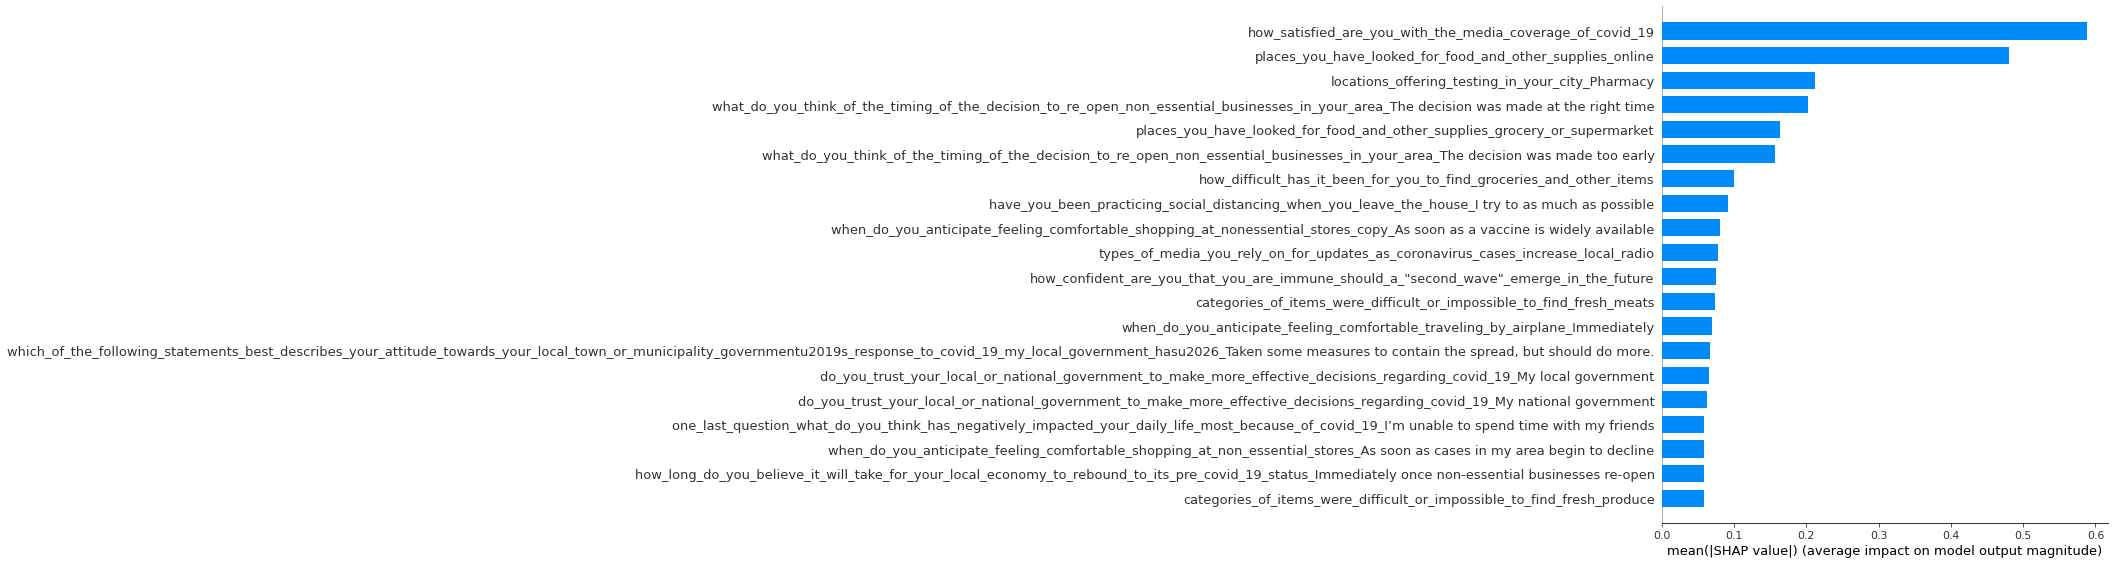

In [164]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=20)

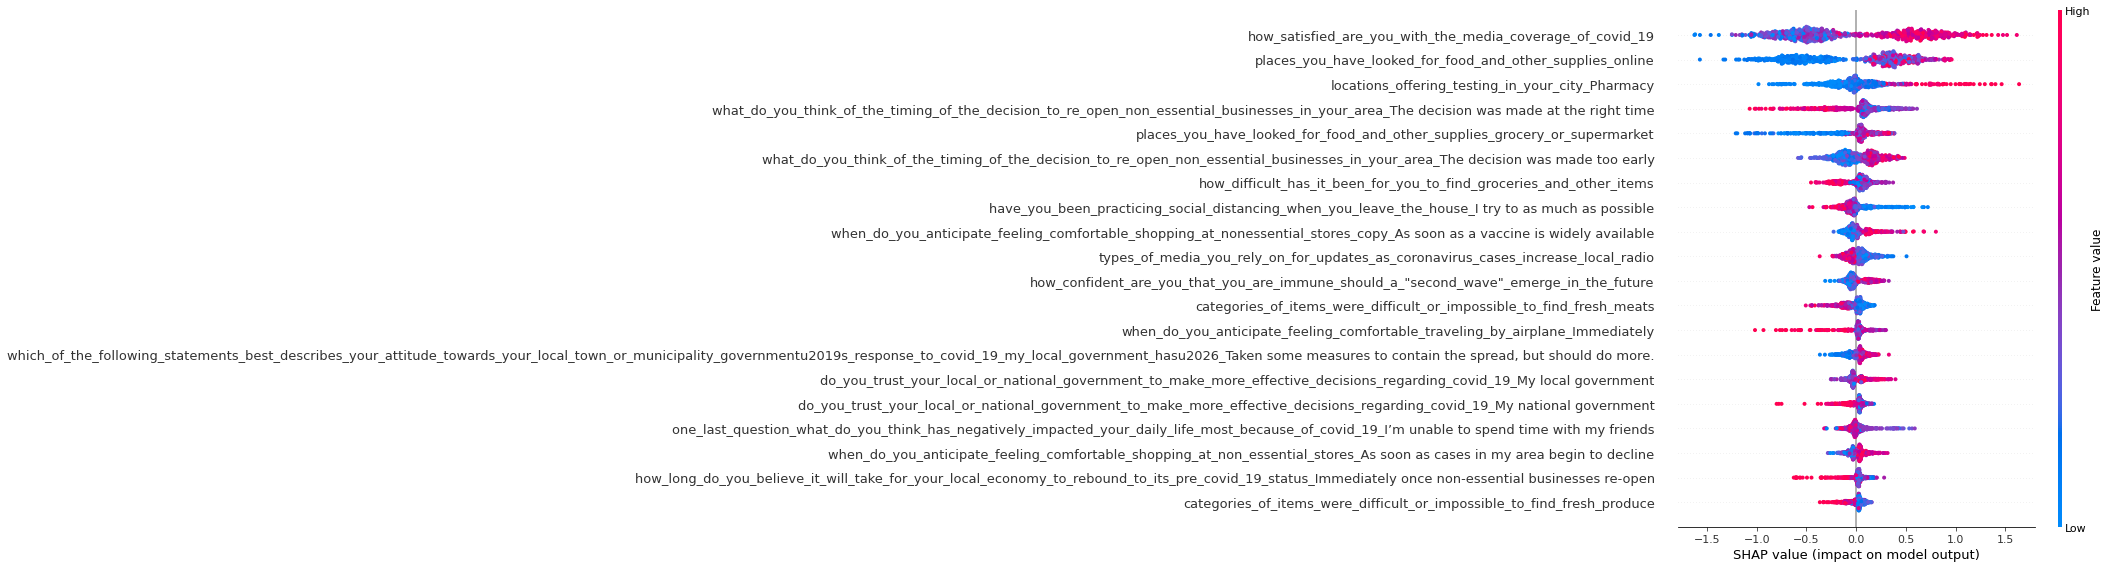

In [165]:
shap.summary_plot(shap_values, X_test)

# XGBoost

In [178]:
import xgboost as xgb
XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode = 0.5, colsample_bylevel=0.5, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 200, gamma=0.5)

In [179]:
XG.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=0.5, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
XG.score(X_test, y_test)

0.83843619090624

In [186]:
preds= XG.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.2403871131229431

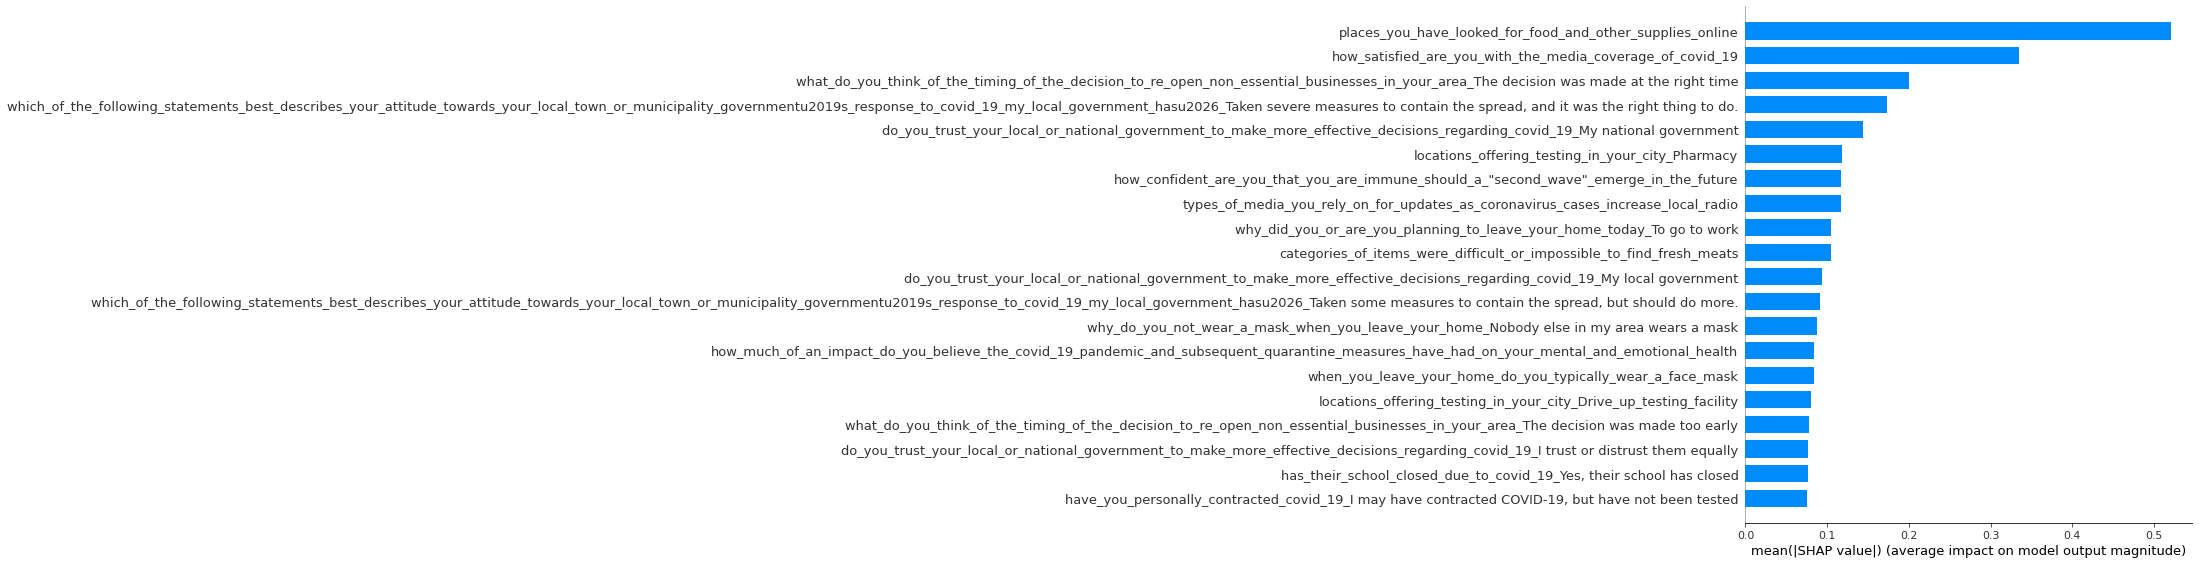

In [181]:
explainer = shap.TreeExplainer(XG)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=20)

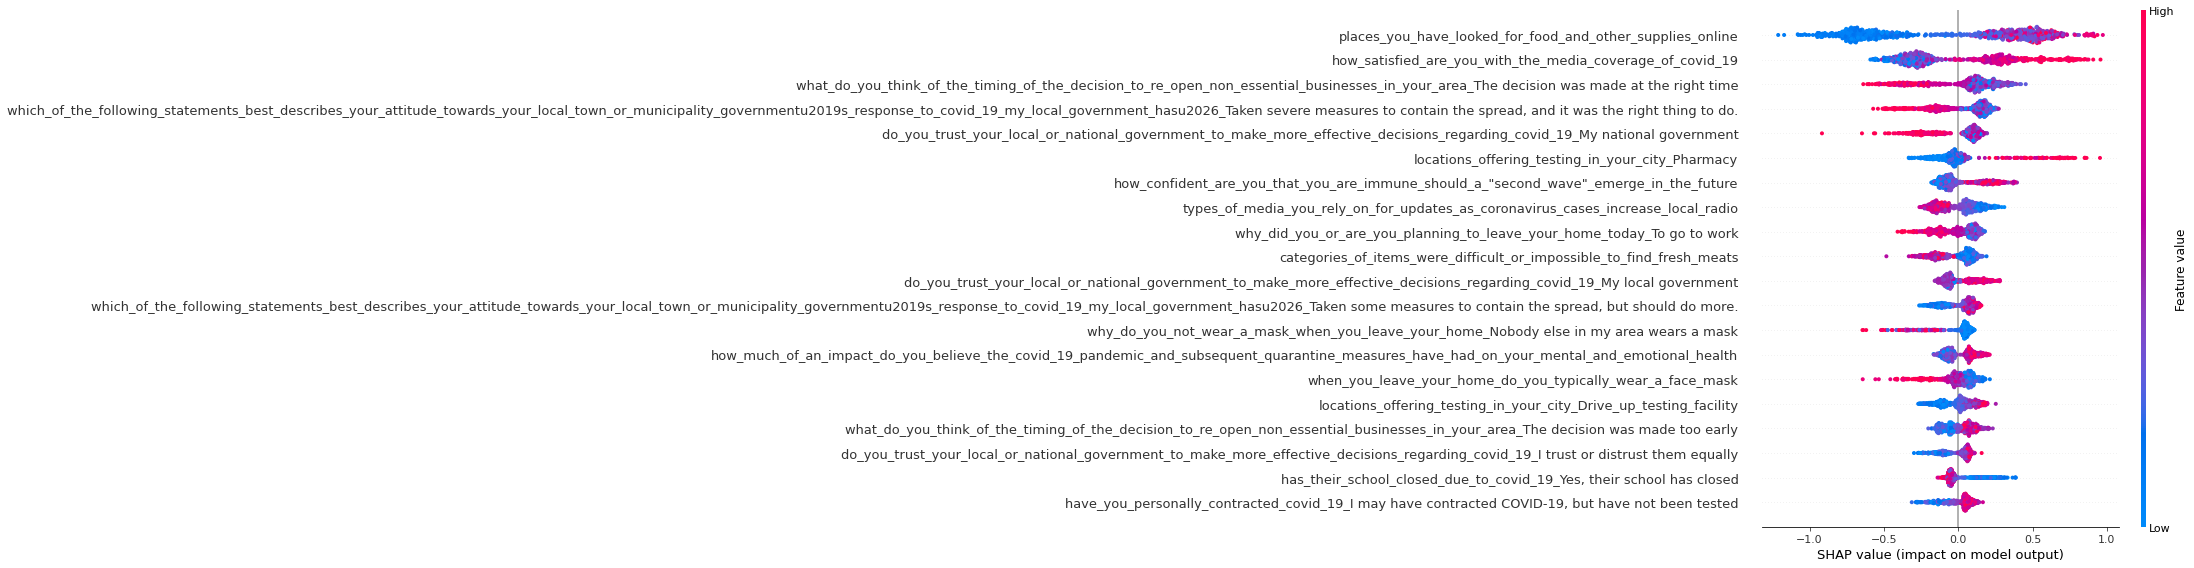

In [182]:
shap.summary_plot(shap_values, X_test)

## Tuning parameters

In [188]:
xgb1 = xgb.XGBRegressor()
parameters = {'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [1, 2, 4],
              'subsample': [0.7, 0.9],
               'gamma':[0, 0.5],
              'colsample_bylevel': [0.5, 0.7],
              'colsample_bynode': [0.5, 0.7],
              'n_estimators': [100, 200, 500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
0.8261706079139839
{'colsample_bylevel': 0.7, 'colsample_bynode': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}


In [189]:
best_params = {'colsample_bylevel': 0.7, 'colsample_bynode': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}

In [190]:
XG2 = xgb.XGBRegressor(objective ='reg:squarederror',**best_params)
XG2.fit(X_train, y_train) 
XG2.score(X_test, y_test) #best model

0.8674435519377919

In [191]:
preds= XG2.predict(X_test)
rmse= mean_squared_error(y_test, preds, squared=True)
rmse

1.0176865156867856

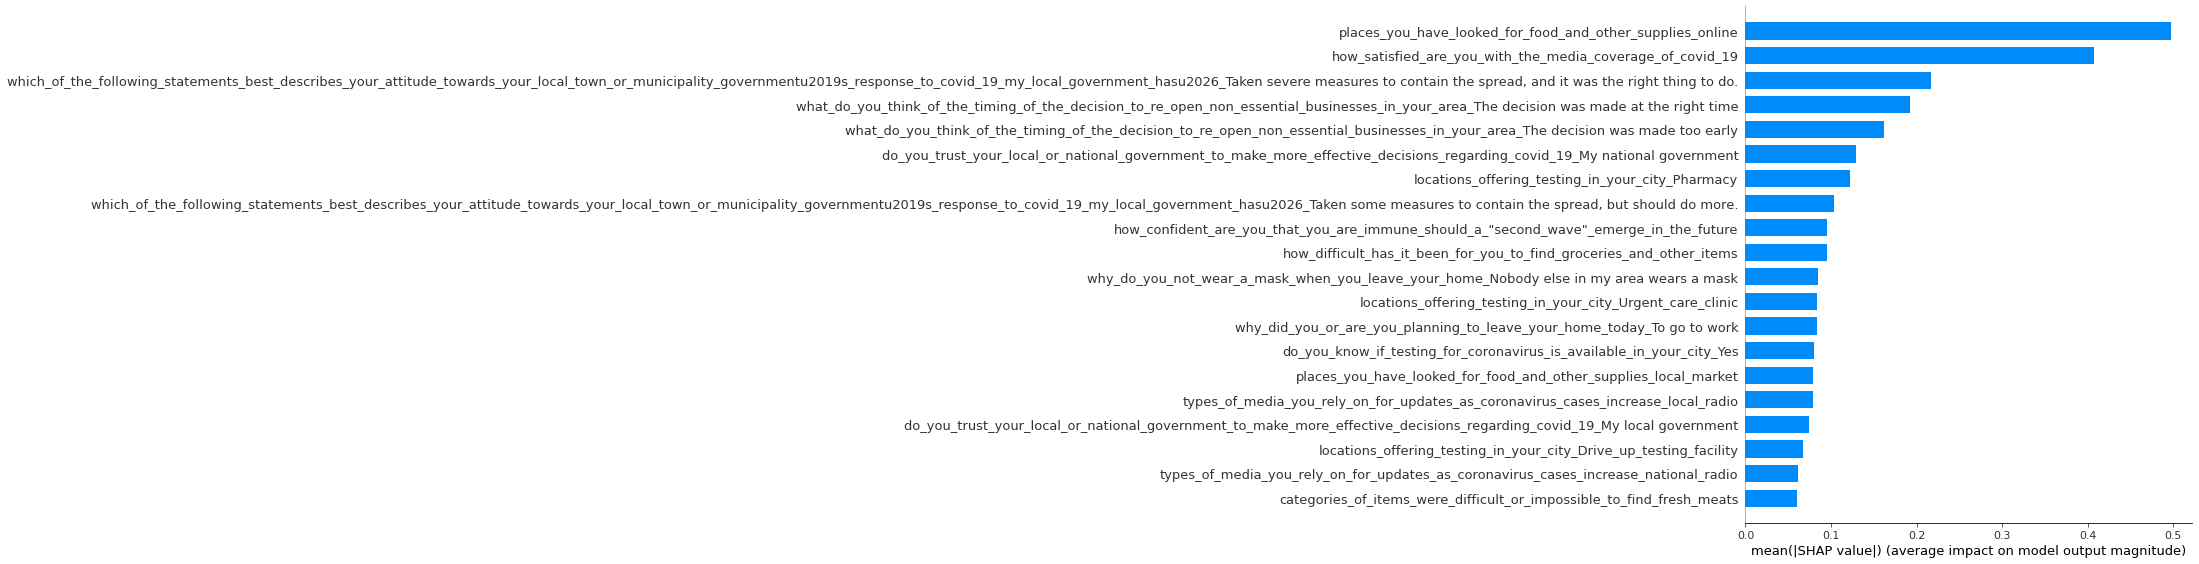

In [192]:
explainer = shap.TreeExplainer(XG2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=20)

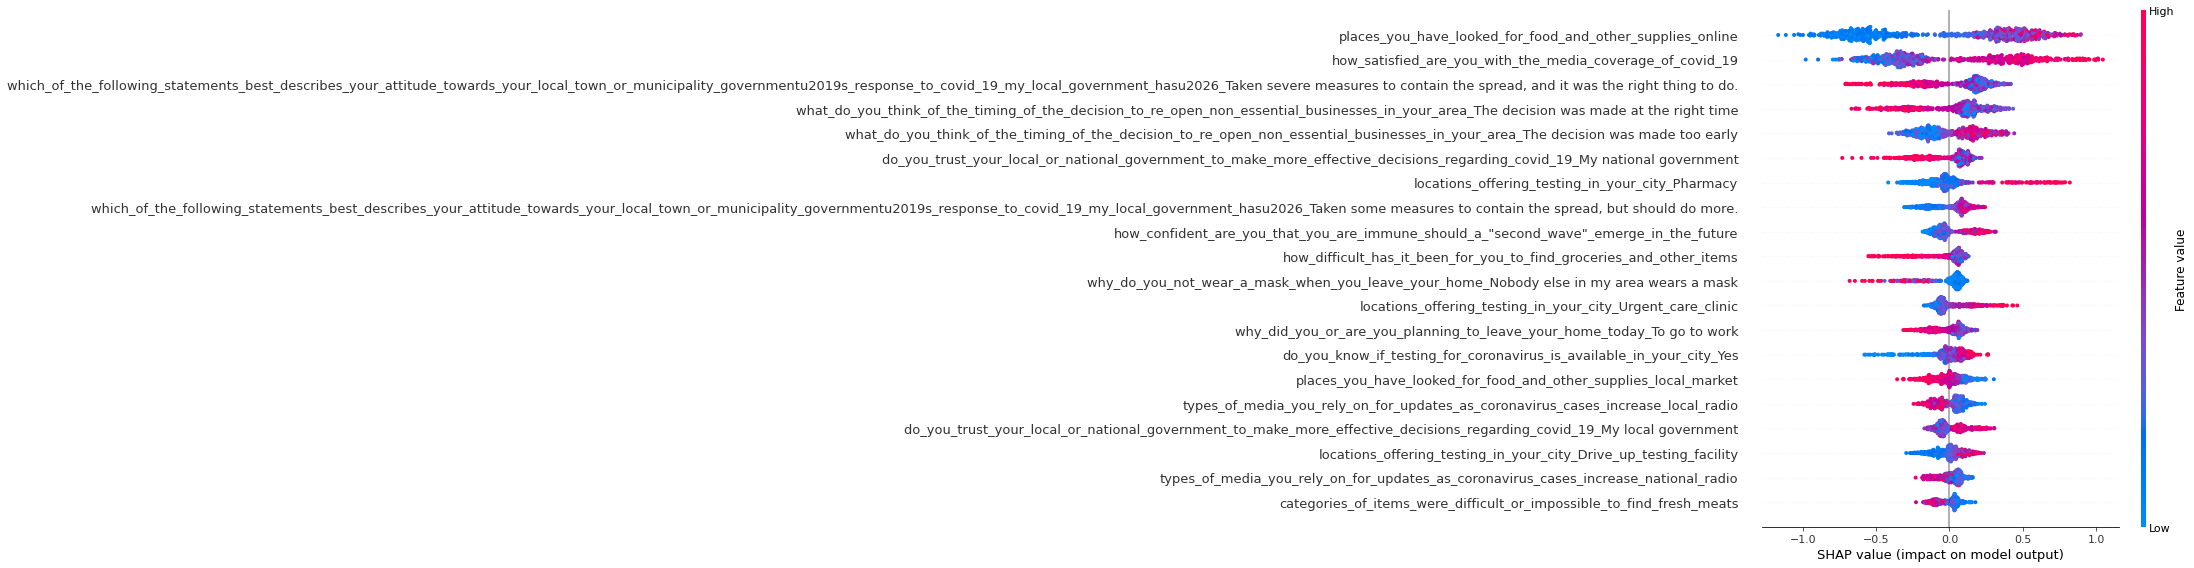

In [193]:
shap.summary_plot(shap_values, X_test)